# ECG Visualizations

Loading the required imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
import tensorflow as tf
import tensorflow_addons as tfa
from os.path import join as osj
import random
import pickle
import time
import os
import argparse

## Functions

In [23]:
# Load real dataset
def get_real_data():

    dict_samples = spio.loadmat('../data/s2s_mitbih_aami.mat')
    samples = dict_samples['s2s_mitbih']
    values = samples[0]['seg_values']
    labels = samples[0]['seg_labels']

    return values, labels

# Load Differential Privacy datasets
def get_dp_data(m, e):
    
    dict_samples = spio.loadmat('../data/s2s_mitbih_aami.mat')
    samples = dict_samples['s2s_mitbih']
    labels = samples[0]['seg_labels']

    with open(osj("..", "data_dp", f"{m}_{e}.pkl"), "rb") as f:
        values = pickle.load(f)

    return values, labels

# The beats and measured values are separated in a nested array and should be flattened
def flattenarray(array):

    temp_array = array
    temp_array = temp_array[:, 0] # removes the middle dimension
    ls_ecg_values = []
    for beat in temp_array:
        ls_ecg_values.append(np.ndarray.flatten(beat))
    arr_values = np.array(ls_ecg_values).reshape(-1)

    return arr_values

def multiplot_dp_ecg(real_values, dp_data, epsilons, deltas, patient_idx, beat_start, beat_end, mechanism):
    fig, axes = plt.subplots(len(epsilons), len(deltas), figsize=(15, 10), sharex=True, sharey=True)
    fig.suptitle(f"Multiplot of ECGs for configurations of {mechanism}", fontsize=16)

    for i, epsilon in enumerate(epsilons):
        for j, delta in enumerate(deltas):
            ax = axes[i, j] if len(epsilons) > 1 and len(deltas) > 1 else axes

            l_values_filtered = dp_data[epsilon][delta][patient_idx][beat_start:beat_end]
            dp_values = flattenarray(l_values_filtered)

            ax.plot(real_values, linewidth=0.5, color='green')
            ax.plot(dp_values, linewidth=0.1, color='blue')
            ax.set_title(f"ε={epsilon}, δ={delta}", fontsize=10)
            ax.tick_params(axis="both", which="major", labelsize=8)

            # if j == len(deltas) - 1:
            ax.set_xlabel("Time", fontsize=10)
            # if i == 0:
            ax.set_ylabel("ECG Value", fontsize=10)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [4]:
real_values, real_labels = get_real_data()

In [27]:
# Load the splitted DP data as needed

# # [0.001, 0.01, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081, 0.091]
# l_values, l_labels = get_dp_data('laplace', 0.091)
# b_values, b_labels = get_dp_data('bounded_n', 0.091)
g_values, g_labels = get_dp_data('gaussian_a', 0.091)

# # [0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91]
# l_values, l_labels = get_dp_data('laplace', 0.91)
# b_values, b_labels = get_dp_data('bounded_n', 0.91)
# g_values, g_labels = get_dp_data('gaussian_a', 0.91)

# # [1.01, 1.11, 1.21, 1.31, 1.41, 1.51, 1.61, 1.71, 1.81, 1.91, 2.01]
# l_values, l_labels = get_dp_data('laplace', 2.01)
# b_values, b_labels = get_dp_data('bounded_n', 2.01)
# g_values, g_labels = get_dp_data('gaussian_a', 2.01)

## Single patients

In [10]:
# Specify the patient and amount of beats to be plotted
patient_idx = 13
beat_start = 1860
beat_end = 1878

# patient 6 from 110 - 200 + 480 - 490 + 770 - 800
# patient 8 from 25 - 30 + 50 - 60 (baseline wandering) + 1650 - 1700
# patient 13 from 1860 - 1878

In [11]:
# PREPARE REAL DATA
values_filtered = real_values[patient_idx][beat_start:beat_end]
arr_values = flattenarray(values_filtered)

In [30]:
# PREPARE DP DATA
epsilon = 0.091
delta = 0.4

l_values_filtered = l_values[epsilon][delta][patient_idx][beat_start:beat_end]
dp_values = flattenarray(l_values_filtered)

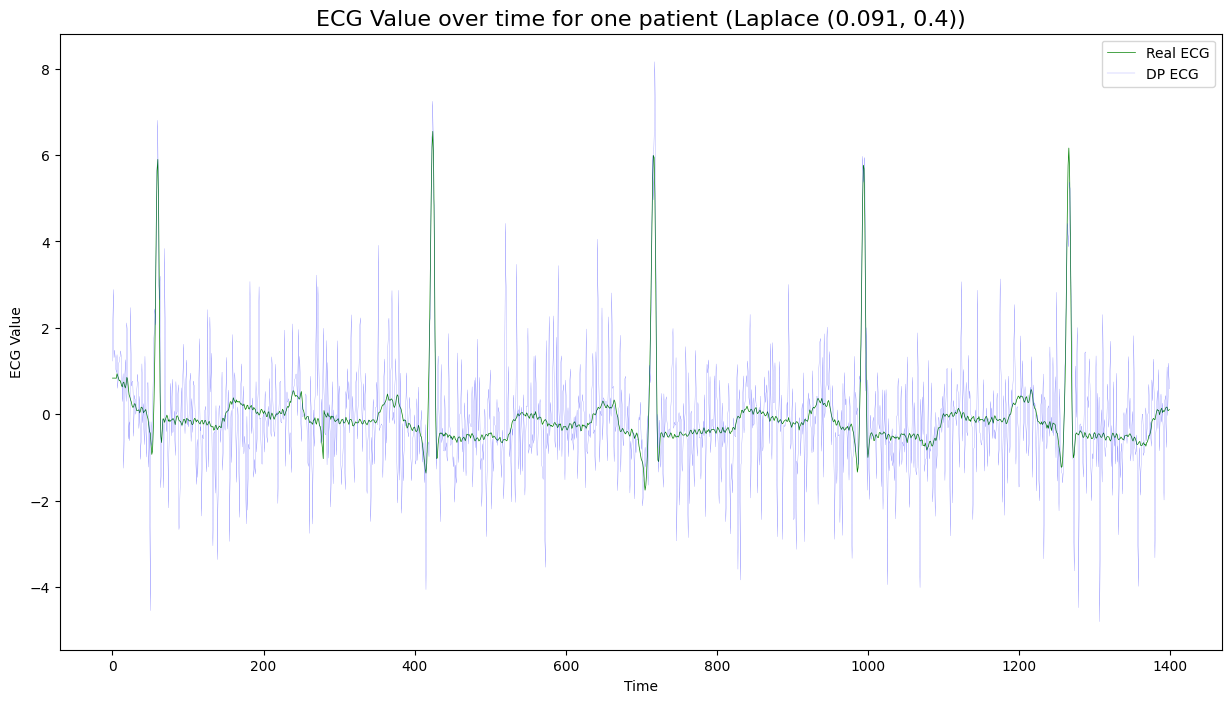

In [32]:
# Patient 6 with beats 772 - 779

plt.figure(figsize=(15, 8), dpi=100)
plt.title("ECG Value over time for one patient (Laplace (0.091, 0.4))", fontsize=16)
plt.plot(arr_values, linewidth=0.5, color='green')
plt.plot(dp_values, linewidth=0.1, color='blue')
plt.legend(["Real ECG", "DP ECG"], loc="upper right")
plt.xlabel("Time", fontsize=10)
plt.ylabel("ECG Value", fontsize=10)
plt.show()

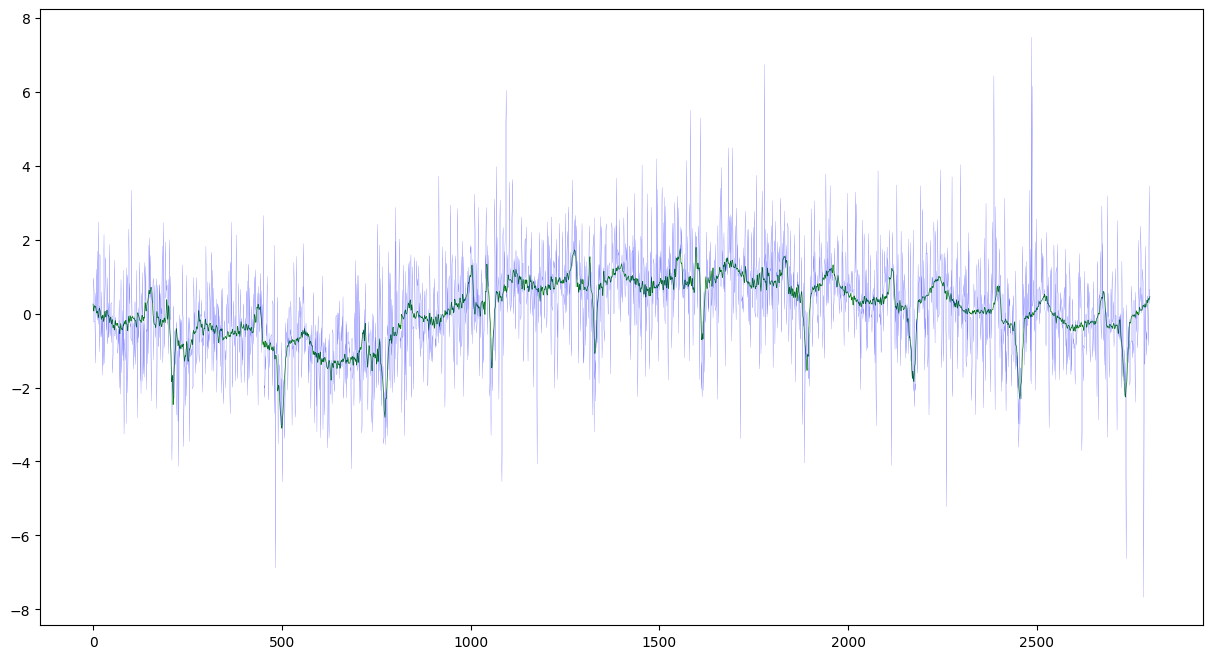

In [ ]:
# Patient 8 with beats 50 - 60
plt.figure(figsize=(15, 8), dpi=100)
plt.plot(arr_values, linewidth=0.5, color='green')
plt.plot(dp_values, linewidth=0.1, color='blue')
plt.show()

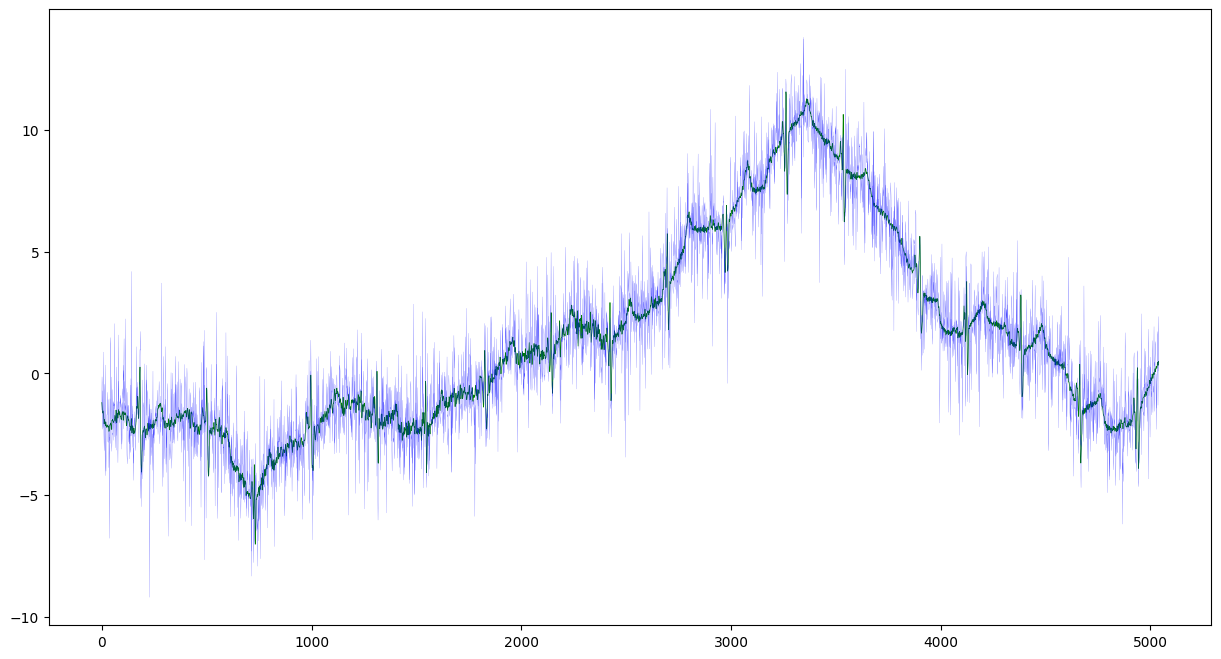

In [ ]:
# Patient 13 with beats 1860 - 1878
plt.figure(figsize=(15, 8), dpi=100)
plt.plot(arr_values, linewidth=0.5, color='green')
plt.plot(dp_values, linewidth=0.1, color='blue')
plt.show()

## Epsilon 0.001 - 0.091

### Laplace

In [17]:
# Specify the patient and amount of beats to be plotted
patient_idx = 0
beat_start = 0
beat_end = 5

In [18]:
# PREPARE REAL DATA
values_filtered = real_values[patient_idx][beat_start:beat_end]
arr_values = flattenarray(values_filtered)

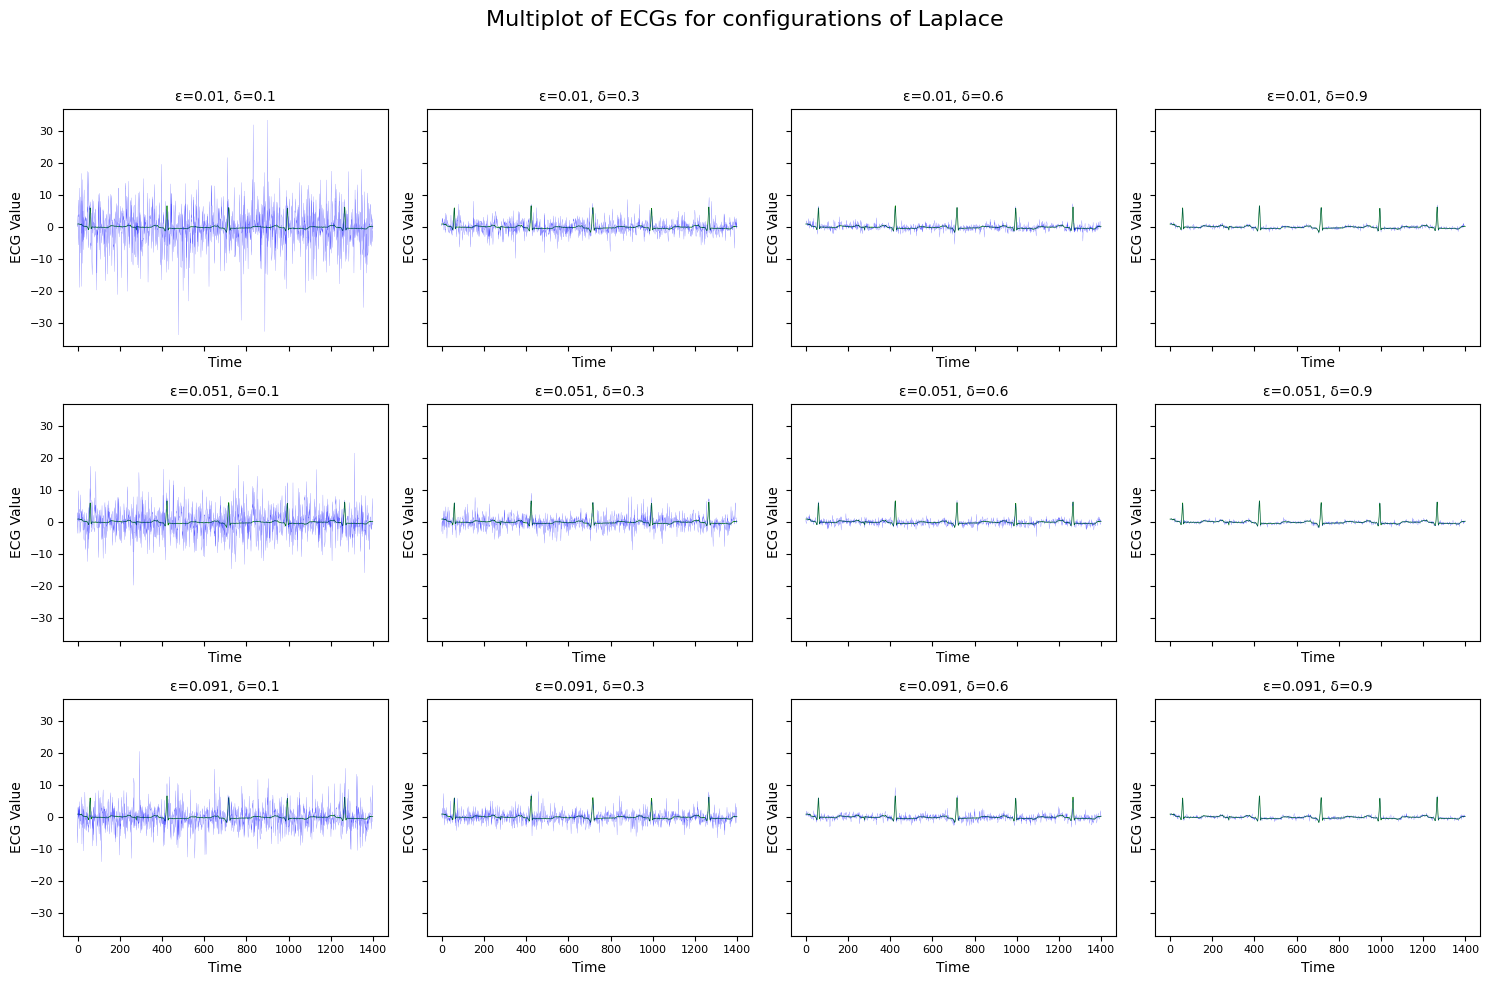

In [24]:
# Multiplot for Laplace
real_values = arr_values
dp_data = l_values
epsilons = [0.01, 0.051, 0.091]
deltas = [0.1, 0.3, 0.6, 0.9]
mechanism = 'Laplace'

multiplot_dp_ecg(real_values, dp_data, epsilons, deltas, patient_idx, beat_start, beat_end, mechanism)

### Bounded Noise

In [28]:
# # Multiplot for Laplace Bounded Noise
# real_values = arr_values
# dp_data = b_values
# epsilons = [0.01, 0.051, 0.091]
# deltas = [0.2, 0.3, 0.4]
# mechanism = "Laplace Bounded Noise"

# multiplot_dp_ecg(real_values, dp_data, epsilons, deltas, patient_idx, beat_start, beat_end, mechanism)

### Gaussian Analytic

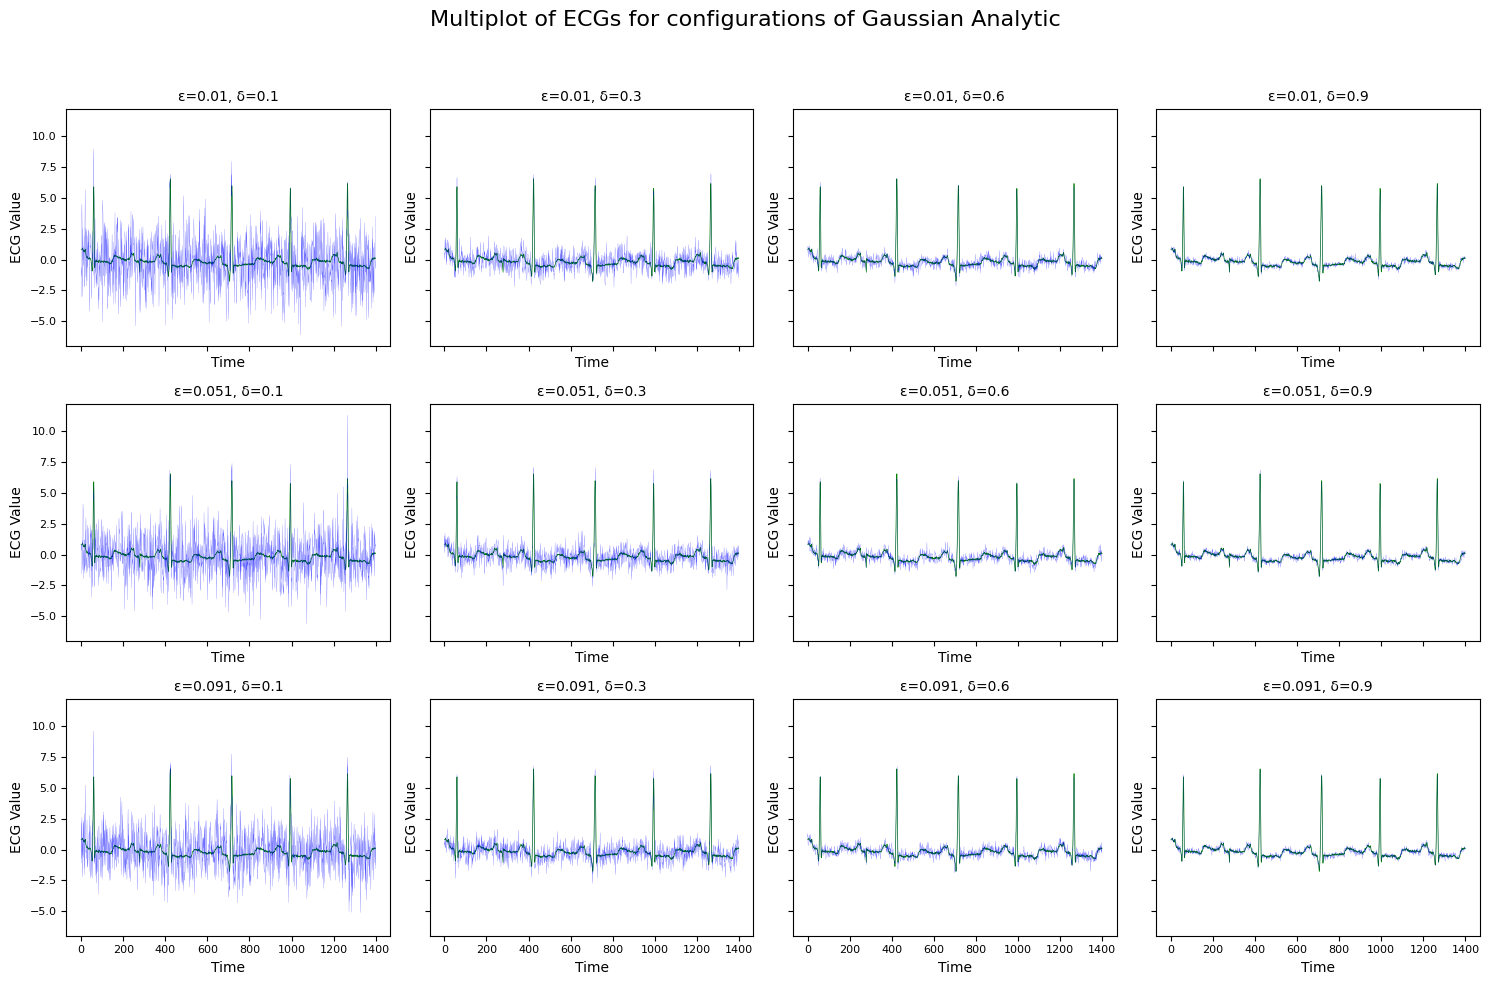

In [29]:
# Multiplot for Gaussian Analytics
real_values = arr_values
dp_data = g_values
epsilons = [0.01, 0.051, 0.091]
deltas = [0.1, 0.3, 0.6, 0.9]
mechanism = "Gaussian Analytic"

multiplot_dp_ecg(real_values, dp_data, epsilons, deltas, patient_idx, beat_start, beat_end, mechanism)

## Epsilon 0.11 - 0.91

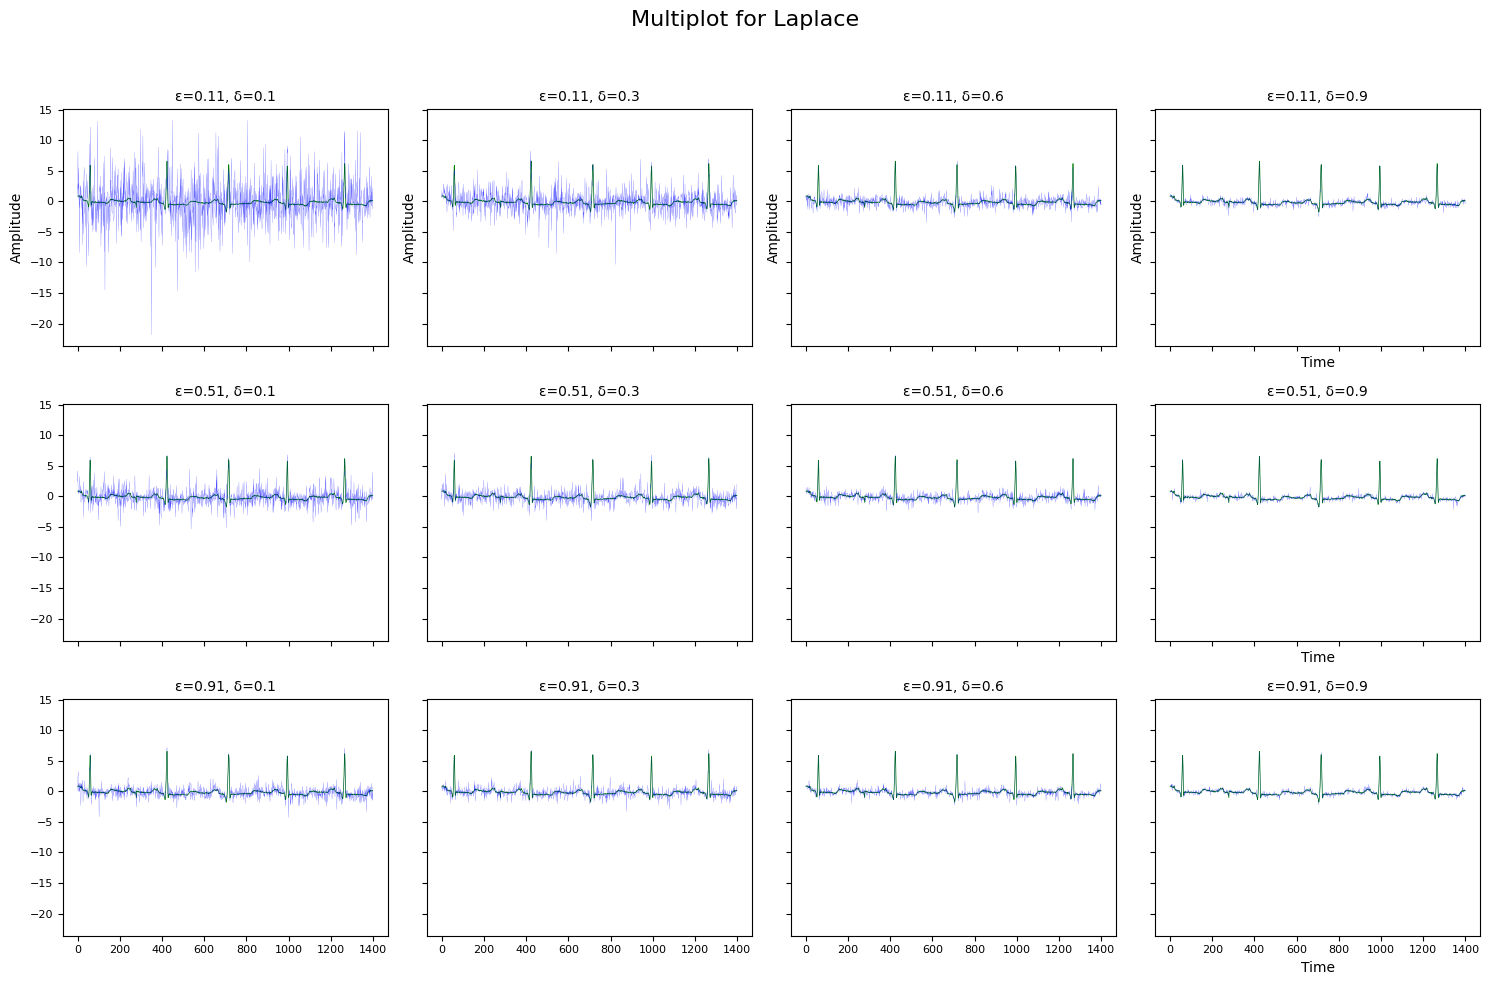

In [242]:
# Multiplot for Laplace
real_values = arr_values
dp_data = l_values
epsilons = [0.11, 0.51, 0.91]
deltas = [0.1, 0.3, 0.6, 0.9]
mechanism = 'Laplace'

multiplot_dp_ecg(real_values, dp_data, epsilons, deltas, patient_idx, beat_start, beat_end, mechanism)

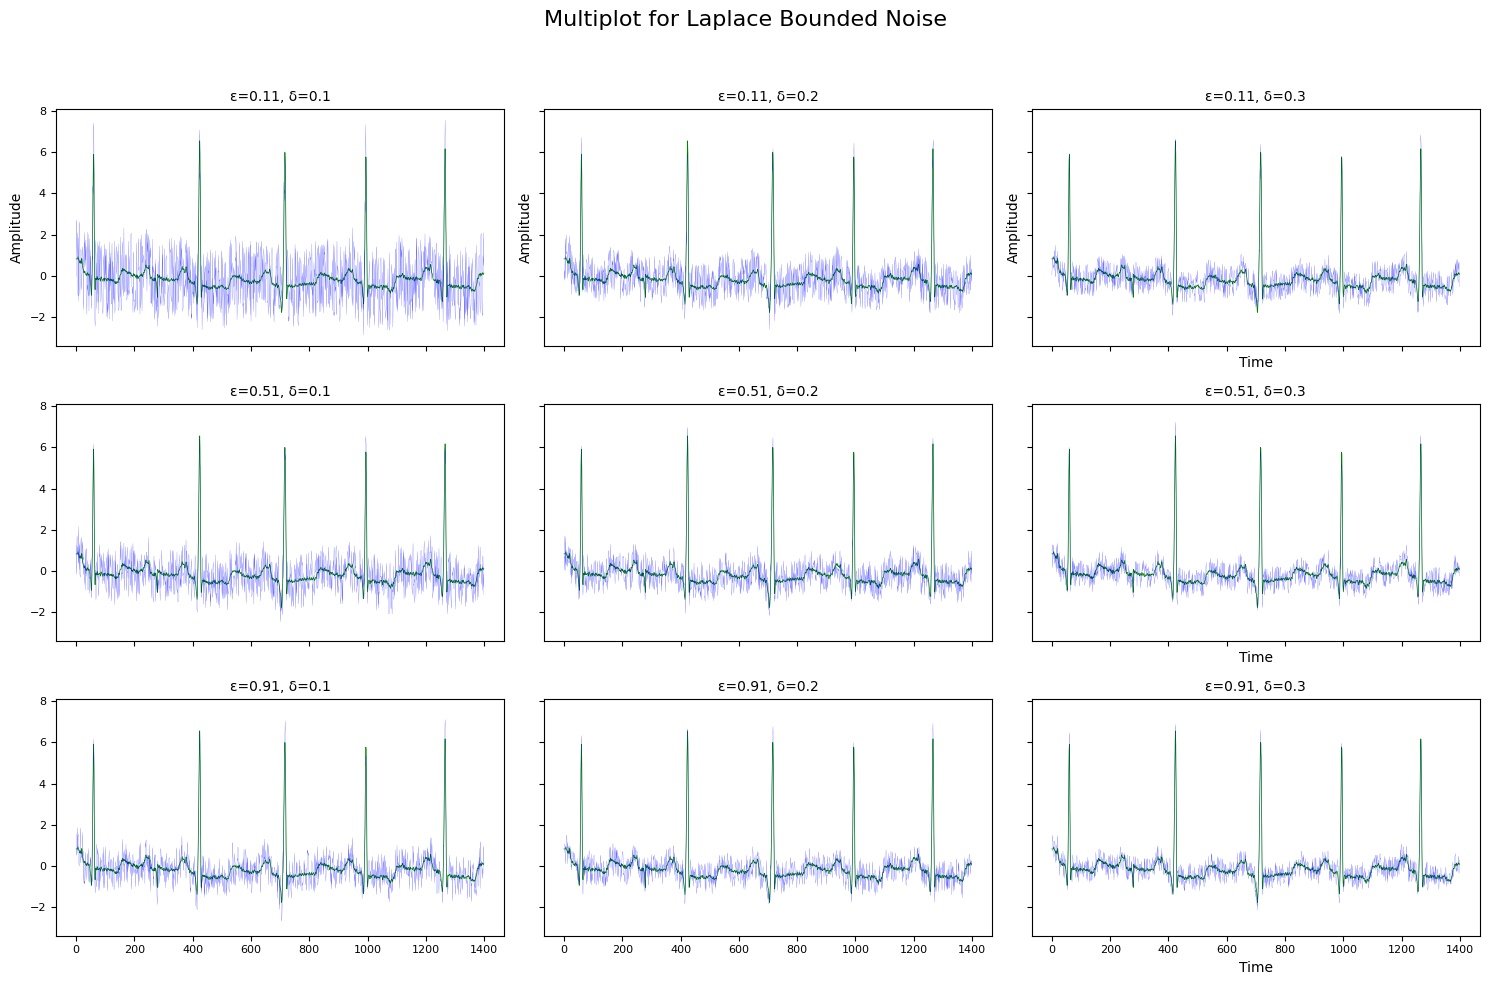

In [243]:
# Multiplot for Laplace Bounded Noise
real_values = arr_values
dp_data = b_values
epsilons = [0.11, 0.51, 0.91]
deltas = [0.1, 0.2, 0.3]
mechanism = "Laplace Bounded Noise"

multiplot_dp_ecg(real_values, dp_data, epsilons, deltas, patient_idx, beat_start, beat_end, mechanism)

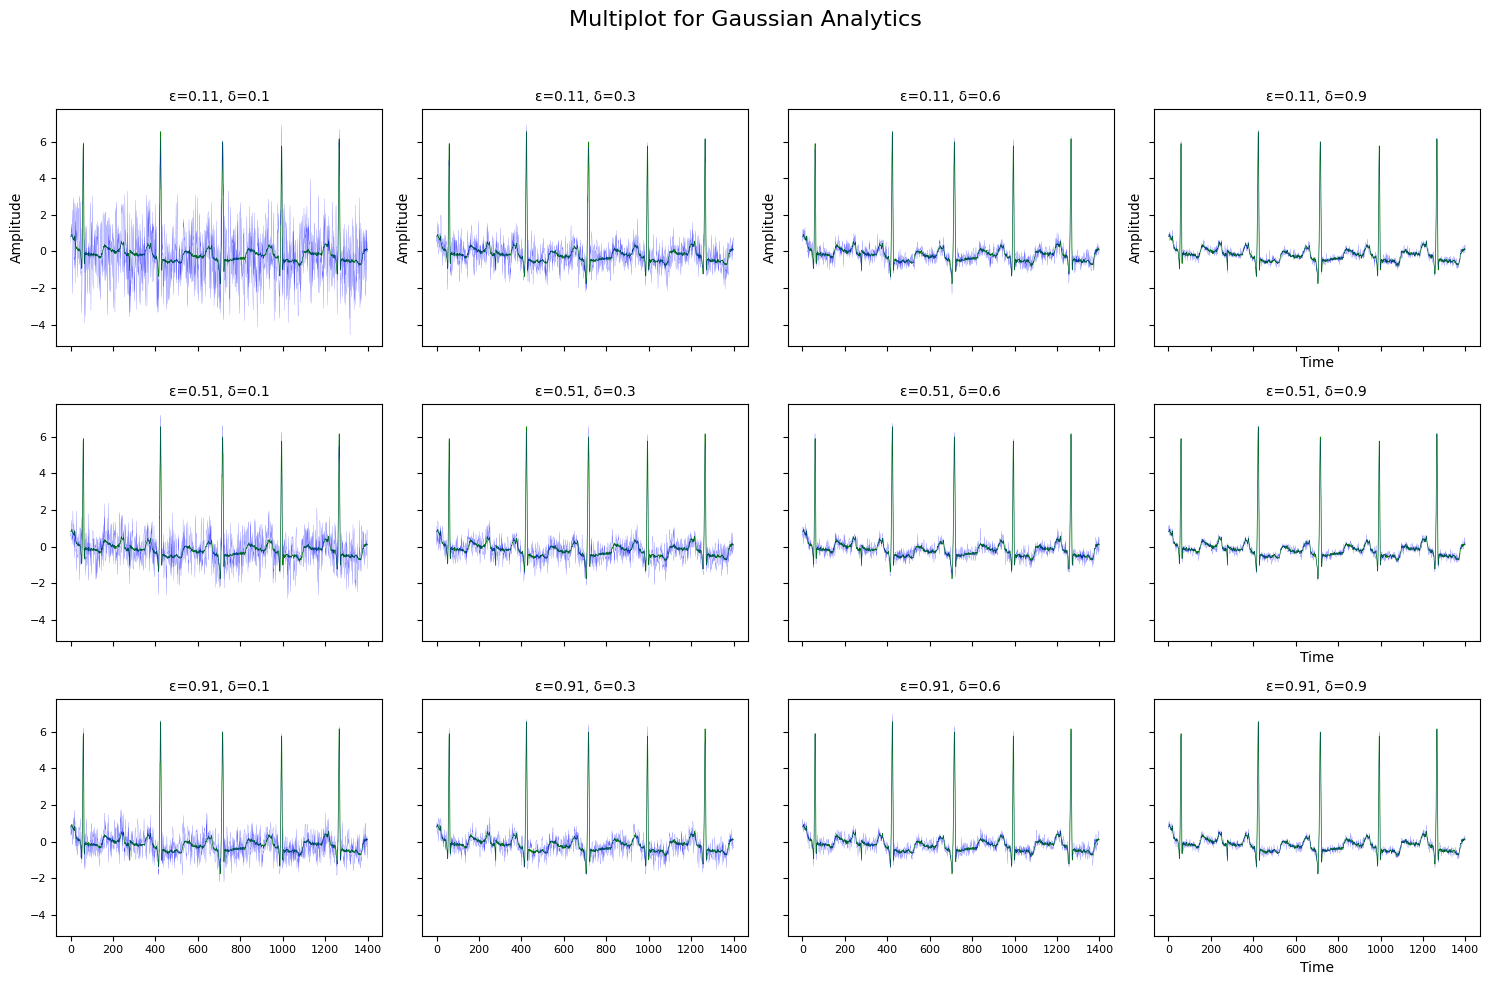

In [244]:
# Multiplot for Gaussian Analytics
real_values = arr_values
dp_data = g_values
epsilons = [0.11, 0.51, 0.91]
deltas = [0.1, 0.3, 0.6, 0.9]
mechanism = "Gaussian Analytics"

multiplot_dp_ecg(real_values, dp_data, epsilons, deltas, patient_idx, beat_start, beat_end, mechanism)

## Epsilon 1.01 - 2.01

In [ ]:
# # Multiplot for Laplace
# real_values = arr_values
# dp_data = l_values
# epsilons = [1.01, 1.51, 2.01]
# deltas = [0.1, 0.3, 0.6, 0.9]
# mechanism = 'Laplace'

# multiplot_dp_ecg(real_values, dp_data, epsilons, deltas, patient_idx, beat_start, beat_end, mechanism)

In [ ]:
# # Multiplot for Laplace Bounded Noise
# real_values = arr_values
# dp_data = b_values
# epsilons = [1.01, 1.51, 2.01]
# deltas = [0.1, 0.2, 0.3]
# mechanism = "Laplace Bounded Noise"

# multiplot_dp_ecg(real_values, dp_data, epsilons, deltas, patient_idx, beat_start, beat_end, mechanism)

In [ ]:
# # Multiplot for Gaussian Analytics
# real_values = arr_values
# dp_data = g_values
# epsilons = [1.01, 1.51, 2.01]
# deltas = [0.1, 0.3, 0.6, 0.9]
# mechanism = "Gaussian Analytics"

# multiplot_dp_ecg(real_values, dp_data, epsilons, deltas, patient_idx, beat_start, beat_end, mechanism)